In [8]:
import os
import numpy as np
from tqdm import tqdm 
from PIL import Image

def read_images(path):
    files = os.listdir(path)
    files = [file for file in files if file[-4:] == ".jpg"]
    
    images = []
    for file in tqdm(files):
        try:
            image = Image.open(path + "/" + file)
            image = image.resize((224,224), Image.LANCZOS)
            image = image.convert("RGB")

            image = np.asarray(image)

            images.append(image)
        except OSError:
            pass
        
    return images
    
    
    
    
mona_lisa = read_images("Desktop/Bilder/mona_lisa")
mona_lisa = np.asarray(mona_lisa)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 43.42it/s]


In [9]:
mona_lisa.shape

(50, 224, 224, 3)

In [105]:
import os
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop

In [11]:
#X = preprocess_input(mona_lisa)

In [106]:
vgg16_model = VGG16(include_top = False,input_shape=(224,224,3))
#vgg16_model.summary()

In [107]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(3, activation="sigmoid"))

#model.compile(optimizer=Adam(learning_rate=0.00001),loss = "categorical_crossentropy", metrics = ["acc"])
#model.summary()

In [116]:
TRAINING_DIR = "Bilddaten/Train"
training_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (224,224),
    class_mode = 'categorical'
)

SyntaxError: positional argument follows keyword argument (<ipython-input-116-003e1c50f5c0>, line 8)

In [117]:
train_generator.class_indices

{'die_heilige_familie': 0, 'erschaffung_adams': 1, 'van_gogh_selbstbildnis': 2}

In [109]:
VALIDATION_DIR = "Bilddaten/Train"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (224,224),
    class_mode = 'categorical'
)

Found 144 images belonging to 3 classes.


In [110]:
model.compile(optimizer=Adam(learning_rate=0.00001),loss = "categorical_crossentropy", metrics = ["acc"])

In [112]:
model.fit(train_generator, epochs = 5,
    validation_data = validation_generator,
    verbose = 1)

Epoch 1/5
5/5 [==============================] - 462s 94s/step - loss: 0.9242 - acc: 0.5625 - val_loss: 0.5071 - val_acc: 0.9236
Epoch 2/5
5/5 [==============================] - 444s 92s/step - loss: 0.3962 - acc: 0.9514 - val_loss: 0.2214 - val_acc: 0.9722
Epoch 3/5
5/5 [==============================] - 551s 127s/step - loss: 0.1765 - acc: 0.9722 - val_loss: 0.1089 - val_acc: 0.9861
Epoch 4/5
5/5 [==============================] - 563s 117s/step - loss: 0.0931 - acc: 0.9931 - val_loss: 0.0585 - val_acc: 1.0000
Epoch 5/5
5/5 [==============================] - 543s 112s/step - loss: 0.0463 - acc: 1.0000 - val_loss: 0.0262 - val_acc: 1.0000


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x220B42E82E0>


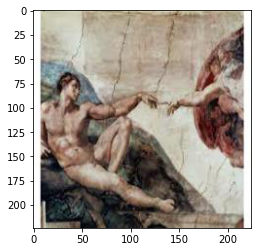

In [71]:
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt
#import cv2
#display.display(Image.open('C:/Users/Smurf/Desktop/57.jpg'))
img = Image.open('C:/Users/Smurf/Desktop/57.jpg')
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [119]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('C:/Users/Smurf/Desktop/57.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
#print(fn)
classes2 = []
for element in classes:
    if element>0.5:
        element = 1
    elif element <0.5:
        element = 0
classes2.add(element)
print(classes)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [114]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('C:/Users/Smurf/Desktop/7.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
#print(fn)
print(classes)

[[1.0000000e+00 0.0000000e+00 6.5320937e-31]]


In [115]:
import numpy as np
from keras.preprocessing import image

img = image.load_img('C:/Users/Smurf/Desktop/104.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
#print(fn)
print(classes)

[[1.0727992e-21 0.0000000e+00 1.0000000e+00]]


In [ ]:
labels = ["Michelangelo-ErschaffungAdams", "Michelangelo-Die heilige Familie", "VanGogh-Selbstbildnis"]